In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 14.3 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="DUVhNhJb1kc9OwbmAh78")
project = rf.workspace("projectk-7ix77").project("deep-plastic-1q8yj")
version = project.version(1)
dataset = version.download("yolov11")
                

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.10.0 requires tensorflow==2.17.0, but you have tensorflow 2.17.1 which is incompatible.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Deep-plastic-1 in yolov11:: 100%|██████████| 5702/5702 [00:00<00:00, 8589.42it/s]


In [4]:
model=YOLO("yolo11s.pt")

100%|██████████| 18.4M/18.4M [00:00<00:00, 177MB/s]


In [5]:
# Train the model
train_results = model.train(
    data='/kaggle/working/Deep-plastic-1/data.yaml',  # path to dataset YAML
    epochs=200,  # number of training epochs
    imgsz=416,  # training image size
    device="0",  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
)

Ultralytics 8.3.70 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/kaggle/working/Deep-plastic-1/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

100%|██████████| 755k/755k [00:00<00:00, 18.0MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 76.2MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/Deep-plastic-1/train/labels... 1991 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1991/1991 [00:02<00:00, 968.19it/s] 

train: New cache created: /kaggle/working/Deep-plastic-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.2 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /kaggle/working/Deep-plastic-1/valid/labels... 565 images, 0 backgrounds, 0 corrupt: 100%|██████████| 565/565 [00:00<00:00, 1015.10it/s]

val: New cache created: /kaggle/working/Deep-plastic-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      2.22G      1.729      2.388      1.612         19        416: 100%|██████████| 125/125 [00:26<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.70it/s]

                   all        565        883     0.0361      0.361     0.0257    0.00924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      2.21G       1.93      2.076      1.799         13        416: 100%|██████████| 125/125 [00:24<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.30it/s]

                   all        565        883      0.257      0.238      0.152     0.0512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      2.18G      1.964      2.083      1.792         13        416: 100%|██████████| 125/125 [00:23<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.32it/s]


                   all        565        883      0.124      0.229     0.0589     0.0198

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      2.14G      1.913      2.048      1.782         13        416: 100%|██████████| 125/125 [00:23<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.19it/s]


                   all        565        883      0.271      0.318      0.232     0.0987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      2.12G       1.86      1.919      1.725         12        416: 100%|██████████| 125/125 [00:23<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.18it/s]

                   all        565        883      0.418      0.329      0.326      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      2.18G      1.831      1.843      1.674         30        416: 100%|██████████| 125/125 [00:23<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.29it/s]

                   all        565        883      0.524      0.398      0.409      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      2.12G      1.781      1.786      1.645         17        416: 100%|██████████| 125/125 [00:23<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.38it/s]

                   all        565        883       0.48      0.414       0.42      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      2.11G      1.755      1.722      1.631         22        416: 100%|██████████| 125/125 [00:23<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.34it/s]

                   all        565        883      0.529      0.399       0.42      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      2.12G      1.718      1.657      1.599         17        416: 100%|██████████| 125/125 [00:23<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.22it/s]


                   all        565        883      0.573      0.463      0.495      0.227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      2.19G      1.713      1.626       1.58         20        416: 100%|██████████| 125/125 [00:23<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.38it/s]

                   all        565        883       0.61      0.404      0.466       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      2.12G      1.697      1.592      1.578         24        416: 100%|██████████| 125/125 [00:23<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.37it/s]

                   all        565        883      0.584      0.511      0.512      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      2.13G      1.701      1.617       1.59         11        416: 100%|██████████| 125/125 [00:23<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.26it/s]

                   all        565        883      0.679      0.514      0.588      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      2.12G      1.646      1.503      1.536         23        416: 100%|██████████| 125/125 [00:23<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.16it/s]

                   all        565        883      0.667      0.514      0.581      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      2.19G       1.66      1.513      1.537          7        416: 100%|██████████| 125/125 [00:23<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.32it/s]

                   all        565        883      0.659      0.556      0.596      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      2.12G      1.605      1.498      1.526         46        416: 100%|██████████| 125/125 [00:23<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.26it/s]

                   all        565        883      0.669       0.52      0.605      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      2.11G      1.654      1.488      1.552         18        416: 100%|██████████| 125/125 [00:23<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.44it/s]

                   all        565        883      0.652      0.497      0.544      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      2.11G      1.644      1.473      1.535         13        416: 100%|██████████| 125/125 [00:23<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.32it/s]

                   all        565        883      0.636      0.519      0.591      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      2.18G      1.601      1.466      1.527         10        416: 100%|██████████| 125/125 [00:23<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.42it/s]

                   all        565        883      0.666      0.524      0.584      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      2.12G      1.567       1.39      1.499         32        416: 100%|██████████| 125/125 [00:23<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.46it/s]

                   all        565        883      0.688      0.587      0.651      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      2.12G       1.58      1.367      1.504         19        416: 100%|██████████| 125/125 [00:23<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.32it/s]

                   all        565        883      0.761      0.587      0.683      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      2.12G      1.558      1.398      1.486         29        416: 100%|██████████| 125/125 [00:23<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.04it/s]

                   all        565        883      0.711      0.546      0.647       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      2.18G      1.558      1.364      1.491         13        416: 100%|██████████| 125/125 [00:23<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.35it/s]

                   all        565        883      0.721      0.587      0.676      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      2.13G      1.554      1.343      1.474         17        416: 100%|██████████| 125/125 [00:23<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.44it/s]

                   all        565        883      0.741      0.549      0.652      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      2.12G      1.531       1.29       1.45         18        416: 100%|██████████| 125/125 [00:23<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.35it/s]

                   all        565        883      0.701      0.612      0.687      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      2.12G      1.534      1.302      1.479         12        416: 100%|██████████| 125/125 [00:23<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.32it/s]

                   all        565        883      0.668      0.584      0.626       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      2.19G      1.541      1.271      1.471         15        416: 100%|██████████| 125/125 [00:23<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.41it/s]

                   all        565        883      0.776      0.572      0.669      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      2.13G      1.505      1.252      1.451         16        416: 100%|██████████| 125/125 [00:23<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.22it/s]

                   all        565        883      0.784      0.633      0.711      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      2.13G      1.493      1.229      1.437         16        416: 100%|██████████| 125/125 [00:23<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.30it/s]

                   all        565        883      0.754      0.559      0.654      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      2.12G      1.495      1.205      1.442         12        416: 100%|██████████| 125/125 [00:23<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.34it/s]

                   all        565        883      0.789      0.606      0.715      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      2.18G        1.5      1.224      1.434         11        416: 100%|██████████| 125/125 [00:23<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.34it/s]

                   all        565        883      0.788      0.614      0.713      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      2.11G      1.491      1.226      1.438          8        416: 100%|██████████| 125/125 [00:23<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.32it/s]

                   all        565        883      0.763      0.653      0.728      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      2.15G       1.51       1.24      1.453         13        416: 100%|██████████| 125/125 [00:23<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.23it/s]

                   all        565        883      0.765      0.646      0.728      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      2.13G      1.487      1.207      1.435         20        416: 100%|██████████| 125/125 [00:23<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.43it/s]

                   all        565        883      0.733      0.662      0.716      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      2.19G      1.472      1.188      1.422         10        416: 100%|██████████| 125/125 [00:23<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.38it/s]

                   all        565        883      0.779      0.627      0.721      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      2.11G      1.478      1.183      1.439         19        416: 100%|██████████| 125/125 [00:23<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.34it/s]

                   all        565        883      0.763      0.664      0.734      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      2.12G      1.439      1.157      1.415         20        416: 100%|██████████| 125/125 [00:23<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.34it/s]

                   all        565        883      0.735      0.655      0.727      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      2.12G      1.466      1.149      1.419         18        416: 100%|██████████| 125/125 [00:23<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.42it/s]

                   all        565        883       0.78      0.621      0.724      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      2.18G       1.46      1.134      1.406         32        416: 100%|██████████| 125/125 [00:23<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.20it/s]

                   all        565        883      0.807      0.625      0.727      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      2.12G      1.467      1.172      1.418         15        416: 100%|██████████| 125/125 [00:23<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.35it/s]

                   all        565        883       0.79      0.606      0.726      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      2.14G      1.423      1.125      1.393         15        416: 100%|██████████| 125/125 [00:23<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.35it/s]

                   all        565        883      0.789      0.633      0.743      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      2.08G      1.446       1.13      1.407         12        416: 100%|██████████| 125/125 [00:23<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.43it/s]

                   all        565        883      0.799      0.633       0.74      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200       2.2G      1.413      1.118      1.388         18        416: 100%|██████████| 125/125 [00:23<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.36it/s]

                   all        565        883       0.78      0.663      0.759      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      2.11G      1.428      1.111      1.392         13        416: 100%|██████████| 125/125 [00:23<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.29it/s]

                   all        565        883      0.765      0.597      0.672      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      2.13G       1.43      1.133      1.401          9        416: 100%|██████████| 125/125 [00:23<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.40it/s]

                   all        565        883      0.817      0.638      0.764      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      2.11G      1.397        1.1      1.368         11        416: 100%|██████████| 125/125 [00:23<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.44it/s]

                   all        565        883      0.776      0.682      0.763      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      2.18G      1.407      1.093      1.371         11        416: 100%|██████████| 125/125 [00:23<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.25it/s]

                   all        565        883      0.807      0.646       0.75      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      2.14G      1.401      1.078      1.377         14        416: 100%|██████████| 125/125 [00:23<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.45it/s]

                   all        565        883      0.798      0.686      0.774      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      2.11G      1.393      1.068      1.359         38        416: 100%|██████████| 125/125 [00:23<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.53it/s]

                   all        565        883       0.83      0.665      0.774      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      2.15G      1.408       1.06      1.361         12        416: 100%|██████████| 125/125 [00:23<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.35it/s]

                   all        565        883       0.76      0.687      0.768      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      2.19G      1.391      1.039      1.353         18        416: 100%|██████████| 125/125 [00:23<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.36it/s]

                   all        565        883      0.794      0.668      0.764      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      2.11G      1.404      1.059      1.376         17        416: 100%|██████████| 125/125 [00:23<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.52it/s]

                   all        565        883      0.815       0.69      0.791      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      2.11G       1.39      1.049      1.367         17        416: 100%|██████████| 125/125 [00:23<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.30it/s]

                   all        565        883      0.782      0.672      0.761      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      2.11G      1.408      1.063      1.375         16        416: 100%|██████████| 125/125 [00:23<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.33it/s]

                   all        565        883       0.82      0.677      0.777      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      2.19G      1.371      1.024      1.354         20        416: 100%|██████████| 125/125 [00:23<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.34it/s]

                   all        565        883      0.813      0.658      0.766      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      2.13G      1.378      1.034      1.352         26        416: 100%|██████████| 125/125 [00:23<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.45it/s]

                   all        565        883      0.814      0.703      0.797      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      2.12G      1.371      1.023      1.342         13        416: 100%|██████████| 125/125 [00:23<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.41it/s]

                   all        565        883       0.84      0.686      0.803      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      2.14G      1.358     0.9984      1.349         10        416: 100%|██████████| 125/125 [00:23<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.41it/s]

                   all        565        883      0.842      0.684      0.791      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      2.18G      1.359      1.034      1.343         22        416: 100%|██████████| 125/125 [00:23<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.45it/s]

                   all        565        883      0.831      0.689       0.79      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      2.13G      1.367      1.008       1.34         14        416: 100%|██████████| 125/125 [00:23<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.40it/s]

                   all        565        883      0.821      0.694      0.791      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      2.11G       1.36     0.9867      1.335          9        416: 100%|██████████| 125/125 [00:23<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.40it/s]

                   all        565        883      0.824      0.709      0.801      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      2.12G      1.354     0.9989      1.331          8        416: 100%|██████████| 125/125 [00:23<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.56it/s]

                   all        565        883      0.819      0.663      0.779       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      2.19G      1.346      1.003      1.345         10        416: 100%|██████████| 125/125 [00:23<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.38it/s]

                   all        565        883      0.847       0.71      0.804      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      2.12G      1.328     0.9841      1.332         34        416: 100%|██████████| 125/125 [00:23<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.38it/s]

                   all        565        883      0.825      0.714        0.8      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      2.11G      1.349     0.9792      1.335         17        416: 100%|██████████| 125/125 [00:23<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.48it/s]

                   all        565        883      0.843      0.687      0.804      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      2.12G      1.341     0.9605      1.324         15        416: 100%|██████████| 125/125 [00:23<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.46it/s]

                   all        565        883      0.823      0.682      0.788      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      2.19G      1.347     0.9778      1.325         16        416: 100%|██████████| 125/125 [00:23<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.50it/s]

                   all        565        883      0.828      0.656      0.773      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      2.12G       1.33     0.9565      1.327         18        416: 100%|██████████| 125/125 [00:23<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.44it/s]

                   all        565        883      0.832        0.7      0.804      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      2.11G       1.32      0.952      1.311          8        416: 100%|██████████| 125/125 [00:23<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.47it/s]

                   all        565        883      0.826      0.711      0.805      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      2.11G       1.32     0.9436      1.311          9        416: 100%|██████████| 125/125 [00:23<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.52it/s]

                   all        565        883      0.826      0.701      0.797      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      2.18G      1.319     0.9386      1.318         21        416: 100%|██████████| 125/125 [00:23<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.31it/s]

                   all        565        883       0.85      0.697        0.8       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      2.11G      1.284     0.9201      1.296         16        416: 100%|██████████| 125/125 [00:23<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.46it/s]

                   all        565        883      0.855      0.686      0.791      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      2.12G       1.29     0.9315      1.297         17        416: 100%|██████████| 125/125 [00:23<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.44it/s]

                   all        565        883      0.857      0.708      0.803      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      2.12G       1.33     0.9459      1.309         18        416: 100%|██████████| 125/125 [00:23<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.50it/s]

                   all        565        883       0.82      0.697      0.789      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      2.18G      1.308     0.9452      1.303         31        416: 100%|██████████| 125/125 [00:23<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.53it/s]

                   all        565        883      0.822      0.675       0.77      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      2.11G      1.291     0.9188      1.305         13        416: 100%|██████████| 125/125 [00:23<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.53it/s]

                   all        565        883      0.834      0.716      0.806      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      2.11G      1.323     0.9224       1.29         13        416: 100%|██████████| 125/125 [00:23<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.48it/s]

                   all        565        883      0.854      0.715      0.815      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      2.11G      1.288     0.9175      1.286         20        416: 100%|██████████| 125/125 [00:23<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.23it/s]

                   all        565        883      0.898      0.692      0.815      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      2.19G       1.26     0.8871      1.288         22        416: 100%|██████████| 125/125 [00:23<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.34it/s]

                   all        565        883      0.851      0.665       0.78      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      2.12G      1.274     0.9165      1.288         13        416: 100%|██████████| 125/125 [00:23<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.53it/s]

                   all        565        883      0.829        0.7      0.802      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      2.12G      1.284     0.9041      1.283         24        416: 100%|██████████| 125/125 [00:23<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.53it/s]

                   all        565        883      0.841      0.712      0.814      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      2.14G      1.266     0.8979      1.286         13        416: 100%|██████████| 125/125 [00:23<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.52it/s]

                   all        565        883      0.843      0.693      0.798      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      2.19G       1.28     0.9044        1.3         10        416: 100%|██████████| 125/125 [00:23<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.53it/s]

                   all        565        883      0.825      0.728      0.809      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      2.12G      1.249     0.8884      1.271         16        416: 100%|██████████| 125/125 [00:23<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.62it/s]

                   all        565        883      0.832      0.729      0.817      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      2.13G      1.279     0.8839      1.281         17        416: 100%|██████████| 125/125 [00:23<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.46it/s]

                   all        565        883       0.84      0.725       0.81      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      2.08G      1.251     0.8557      1.266         18        416: 100%|██████████| 125/125 [00:23<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.20it/s]

                   all        565        883      0.855      0.704      0.809       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      2.19G       1.26     0.8917      1.281          7        416: 100%|██████████| 125/125 [00:23<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.51it/s]

                   all        565        883      0.851      0.672      0.796      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      2.11G      1.249     0.8656      1.278         14        416: 100%|██████████| 125/125 [00:23<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.54it/s]

                   all        565        883      0.856      0.707      0.817      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      2.12G       1.25     0.8653      1.272         10        416: 100%|██████████| 125/125 [00:23<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.49it/s]

                   all        565        883      0.819      0.745      0.814      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      2.12G      1.228     0.8627      1.257          9        416: 100%|██████████| 125/125 [00:23<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.52it/s]

                   all        565        883      0.852      0.725      0.824      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      2.19G      1.275     0.8779      1.275         18        416: 100%|██████████| 125/125 [00:23<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.43it/s]

                   all        565        883      0.851      0.701      0.811      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      2.12G      1.242     0.8571      1.266         20        416: 100%|██████████| 125/125 [00:23<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.57it/s]

                   all        565        883       0.83      0.706       0.81      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      2.12G      1.242     0.8567      1.268         15        416: 100%|██████████| 125/125 [00:23<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.54it/s]

                   all        565        883      0.839      0.724      0.811      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      2.12G      1.223     0.8286      1.256         11        416: 100%|██████████| 125/125 [00:23<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.42it/s]

                   all        565        883      0.841      0.743      0.824       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      2.18G      1.247      0.855      1.258         13        416: 100%|██████████| 125/125 [00:23<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.52it/s]

                   all        565        883      0.852      0.737      0.824      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      2.14G      1.235     0.8691      1.259         45        416: 100%|██████████| 125/125 [00:23<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.37it/s]

                   all        565        883      0.901      0.704      0.828      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      2.13G      1.228     0.8479      1.256         19        416: 100%|██████████| 125/125 [00:23<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.56it/s]

                   all        565        883      0.824      0.745      0.808      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      2.04G      1.233     0.8444      1.258         32        416: 100%|██████████| 125/125 [00:23<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.49it/s]

                   all        565        883      0.822      0.736      0.821      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      2.19G      1.236     0.8263      1.252         18        416: 100%|██████████| 125/125 [00:23<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.49it/s]

                   all        565        883      0.845      0.721      0.814      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      2.12G      1.227     0.8408       1.26         13        416: 100%|██████████| 125/125 [00:23<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.48it/s]

                   all        565        883      0.847       0.75      0.824      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      2.11G       1.21     0.8115      1.241         10        416: 100%|██████████| 125/125 [00:23<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.46it/s]

                   all        565        883      0.833      0.755      0.828       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      2.11G      1.242      0.831       1.25         14        416: 100%|██████████| 125/125 [00:23<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.41it/s]

                   all        565        883      0.829      0.735      0.822       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      2.18G      1.188     0.8158      1.236         18        416: 100%|██████████| 125/125 [00:23<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.52it/s]

                   all        565        883      0.843      0.749      0.831      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      2.12G      1.191      0.821      1.241         15        416: 100%|██████████| 125/125 [00:23<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.39it/s]

                   all        565        883      0.874      0.712       0.82      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      2.14G      1.219      0.838      1.246         16        416: 100%|██████████| 125/125 [00:23<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.47it/s]

                   all        565        883      0.841      0.742      0.825      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      2.12G      1.185     0.7976      1.221         17        416: 100%|██████████| 125/125 [00:23<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.54it/s]

                   all        565        883      0.869      0.745      0.825      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      2.19G      1.195      0.812      1.231         17        416: 100%|██████████| 125/125 [00:23<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.58it/s]

                   all        565        883      0.833      0.759      0.831      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      2.12G      1.203     0.8286      1.234         16        416: 100%|██████████| 125/125 [00:23<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.63it/s]

                   all        565        883       0.85      0.743      0.835      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      2.13G      1.175     0.7919       1.22         28        416: 100%|██████████| 125/125 [00:23<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.40it/s]

                   all        565        883      0.875      0.744      0.837      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      2.11G      1.183     0.8003      1.224         17        416: 100%|██████████| 125/125 [00:23<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.55it/s]

                   all        565        883      0.856      0.731      0.824      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      2.19G      1.194     0.7879      1.245         16        416: 100%|██████████| 125/125 [00:23<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.56it/s]

                   all        565        883      0.884      0.726      0.833      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      2.12G       1.18     0.7951      1.224         17        416: 100%|██████████| 125/125 [00:23<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.61it/s]

                   all        565        883      0.871       0.73      0.834      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      2.11G      1.176     0.7983      1.221          9        416: 100%|██████████| 125/125 [00:23<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.57it/s]

                   all        565        883      0.858       0.74      0.833      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      2.12G      1.184     0.8155      1.226         49        416: 100%|██████████| 125/125 [00:23<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.50it/s]

                   all        565        883      0.886      0.741      0.841      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200       2.2G      1.188     0.7867      1.229         11        416: 100%|██████████| 125/125 [00:23<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.41it/s]

                   all        565        883      0.872      0.724      0.827      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      2.12G      1.184     0.7951       1.23         30        416: 100%|██████████| 125/125 [00:23<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.51it/s]

                   all        565        883      0.896      0.729      0.831      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      2.12G      1.164     0.7823      1.213         28        416: 100%|██████████| 125/125 [00:23<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.58it/s]

                   all        565        883      0.869      0.746      0.835      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      2.12G      1.154       0.77       1.22         23        416: 100%|██████████| 125/125 [00:23<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.72it/s]

                   all        565        883      0.853      0.742      0.827      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      2.19G      1.161     0.7821      1.218         15        416: 100%|██████████| 125/125 [00:23<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.50it/s]

                   all        565        883      0.869       0.76       0.84      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      2.12G      1.159     0.7638      1.206         33        416: 100%|██████████| 125/125 [00:23<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.48it/s]

                   all        565        883      0.872       0.73      0.829      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      2.12G      1.182      0.777      1.219         16        416: 100%|██████████| 125/125 [00:23<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.57it/s]

                   all        565        883      0.901      0.716      0.831      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      2.13G      1.159     0.7775      1.216         12        416: 100%|██████████| 125/125 [00:23<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.68it/s]

                   all        565        883      0.885      0.737      0.836      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      2.19G      1.159     0.7889      1.205          9        416: 100%|██████████| 125/125 [00:23<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.45it/s]

                   all        565        883      0.862      0.751      0.832      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      2.12G      1.132     0.7504      1.203         15        416: 100%|██████████| 125/125 [00:23<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.61it/s]

                   all        565        883      0.832      0.762      0.833      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      2.12G      1.133     0.7488      1.195         26        416: 100%|██████████| 125/125 [00:23<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.68it/s]

                   all        565        883      0.853      0.774      0.839      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      2.12G      1.151     0.7765      1.212         14        416: 100%|██████████| 125/125 [00:23<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.53it/s]

                   all        565        883      0.884      0.753      0.839      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      2.22G      1.135     0.7464      1.204         13        416: 100%|██████████| 125/125 [00:23<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.43it/s]

                   all        565        883      0.889      0.746       0.84      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      2.12G      1.101     0.7266      1.177         15        416: 100%|██████████| 125/125 [00:23<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.50it/s]

                   all        565        883      0.868      0.751      0.845      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      2.13G      1.119     0.7174      1.185         10        416: 100%|██████████| 125/125 [00:23<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.59it/s]

                   all        565        883      0.903      0.713      0.833      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      2.11G       1.12     0.7399      1.193          8        416: 100%|██████████| 125/125 [00:23<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.45it/s]

                   all        565        883      0.865      0.758      0.836      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      2.19G      1.161      0.749      1.206         14        416: 100%|██████████| 125/125 [00:23<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.60it/s]

                   all        565        883      0.906       0.73      0.842      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      2.12G      1.143     0.7483      1.206         44        416: 100%|██████████| 125/125 [00:23<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.59it/s]

                   all        565        883      0.852      0.762      0.837      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      2.11G      1.111      0.729      1.191         10        416: 100%|██████████| 125/125 [00:23<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.62it/s]

                   all        565        883      0.877      0.733      0.839      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      2.11G      1.135     0.7488        1.2         12        416: 100%|██████████| 125/125 [00:23<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.71it/s]

                   all        565        883      0.879      0.749      0.834      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      2.18G      1.116     0.7313       1.18         28        416: 100%|██████████| 125/125 [00:23<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.42it/s]

                   all        565        883      0.894      0.734      0.833      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      2.12G       1.09     0.7158      1.182         17        416: 100%|██████████| 125/125 [00:23<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.40it/s]

                   all        565        883      0.874      0.754      0.835      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      2.12G      1.107     0.7306       1.18         20        416: 100%|██████████| 125/125 [00:23<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.54it/s]

                   all        565        883      0.873      0.759      0.839       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      2.12G      1.104     0.7259      1.181         15        416: 100%|██████████| 125/125 [00:23<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.50it/s]

                   all        565        883      0.886      0.764       0.84      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      2.23G      1.131     0.7466      1.184         17        416: 100%|██████████| 125/125 [00:23<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.55it/s]

                   all        565        883      0.875      0.768      0.842      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      2.15G      1.082     0.7152      1.173         14        416: 100%|██████████| 125/125 [00:23<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.53it/s]

                   all        565        883      0.872      0.751      0.841       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      2.09G      1.092     0.7052      1.175         16        416: 100%|██████████| 125/125 [00:23<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.61it/s]

                   all        565        883      0.883      0.729      0.834      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      2.12G      1.088     0.7104      1.176         18        416: 100%|██████████| 125/125 [00:23<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.34it/s]

                   all        565        883      0.882      0.747      0.839      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      2.17G      1.062     0.6874      1.169         24        416: 100%|██████████| 125/125 [00:23<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.36it/s]

                   all        565        883      0.865      0.765      0.845      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      2.12G      1.082     0.6998      1.167         10        416: 100%|██████████| 125/125 [00:23<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.55it/s]

                   all        565        883      0.873      0.776      0.847      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      2.13G      1.104      0.709      1.163         18        416: 100%|██████████| 125/125 [00:23<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.70it/s]

                   all        565        883      0.865      0.773       0.85      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      2.11G      1.092     0.7106      1.168         23        416: 100%|██████████| 125/125 [00:23<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.57it/s]

                   all        565        883      0.882      0.769      0.851      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      2.18G      1.072     0.6937      1.163         24        416: 100%|██████████| 125/125 [00:23<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.47it/s]

                   all        565        883      0.899      0.747      0.856      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      2.12G      1.058     0.6854       1.15         15        416: 100%|██████████| 125/125 [00:23<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.55it/s]

                   all        565        883      0.891      0.735      0.842      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      2.15G      1.095     0.7157      1.174         18        416: 100%|██████████| 125/125 [00:23<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.54it/s]

                   all        565        883      0.873      0.757      0.839      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      2.12G      1.083     0.6954      1.159         17        416: 100%|██████████| 125/125 [00:23<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.63it/s]

                   all        565        883       0.88      0.759      0.848      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      2.18G      1.073     0.6951      1.161         23        416: 100%|██████████| 125/125 [00:23<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.45it/s]

                   all        565        883      0.886      0.758       0.85       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      2.12G      1.063     0.6944      1.155         24        416: 100%|██████████| 125/125 [00:23<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.59it/s]

                   all        565        883      0.902      0.755      0.845       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      2.11G      1.058     0.6799      1.156         14        416: 100%|██████████| 125/125 [00:23<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.47it/s]

                   all        565        883      0.893      0.752      0.846      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      2.12G      1.048     0.6868      1.158         13        416: 100%|██████████| 125/125 [00:23<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.62it/s]

                   all        565        883       0.89      0.757      0.846      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      2.19G      1.043     0.6757       1.15         32        416: 100%|██████████| 125/125 [00:23<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.34it/s]

                   all        565        883      0.868      0.768      0.845       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      2.12G      1.057     0.6739      1.148         20        416: 100%|██████████| 125/125 [00:23<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.52it/s]

                   all        565        883       0.88      0.775      0.845      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      2.12G       1.03       0.66      1.152         13        416: 100%|██████████| 125/125 [00:23<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.62it/s]

                   all        565        883      0.874      0.749      0.844       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      2.12G      1.035     0.6606      1.142         10        416: 100%|██████████| 125/125 [00:23<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.67it/s]

                   all        565        883       0.86       0.78      0.849      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      2.19G       1.05      0.674      1.151          9        416: 100%|██████████| 125/125 [00:23<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.37it/s]

                   all        565        883       0.86      0.777       0.84      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      2.13G      1.058     0.6846      1.155         13        416: 100%|██████████| 125/125 [00:23<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.66it/s]

                   all        565        883      0.877      0.763      0.839      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      2.11G      1.031     0.6621      1.139         61        416: 100%|██████████| 125/125 [00:23<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.27it/s]

                   all        565        883      0.871      0.768       0.84      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      2.12G      1.054     0.6778      1.147         19        416: 100%|██████████| 125/125 [00:23<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.51it/s]

                   all        565        883      0.884      0.758      0.845      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      2.17G      1.035     0.6582      1.134         13        416: 100%|██████████| 125/125 [00:23<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.66it/s]

                   all        565        883       0.88      0.754      0.846      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      2.14G      1.021      0.651      1.136          9        416: 100%|██████████| 125/125 [00:23<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.74it/s]

                   all        565        883      0.891       0.76       0.85      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      2.12G      1.011      0.644      1.133         13        416: 100%|██████████| 125/125 [00:23<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.66it/s]

                   all        565        883      0.889      0.764      0.849      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      2.12G      1.021     0.6534      1.138         12        416: 100%|██████████| 125/125 [00:23<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.72it/s]

                   all        565        883      0.887      0.753      0.842      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      2.19G      1.002     0.6428      1.134          8        416: 100%|██████████| 125/125 [00:23<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.19it/s]

                   all        565        883      0.881      0.755      0.843       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      2.12G      1.024      0.654      1.151         14        416: 100%|██████████| 125/125 [00:23<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.59it/s]

                   all        565        883      0.874      0.761      0.842      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      2.11G      1.021     0.6496      1.135         12        416: 100%|██████████| 125/125 [00:23<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.68it/s]

                   all        565        883      0.897      0.755       0.85      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      2.11G      1.023     0.6426      1.136         14        416: 100%|██████████| 125/125 [00:23<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.56it/s]

                   all        565        883      0.872      0.764      0.842      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      2.18G     0.9864     0.6247      1.122         10        416: 100%|██████████| 125/125 [00:23<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.56it/s]

                   all        565        883      0.874      0.761       0.84      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      2.12G      1.024     0.6419      1.134         30        416: 100%|██████████| 125/125 [00:23<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.46it/s]

                   all        565        883      0.892      0.752      0.843      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      2.12G      1.003      0.642      1.131         13        416: 100%|██████████| 125/125 [00:23<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.29it/s]

                   all        565        883      0.885      0.774      0.847      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      2.12G     0.9915     0.6305      1.123         27        416: 100%|██████████| 125/125 [00:23<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.56it/s]

                   all        565        883      0.894      0.762      0.844      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      2.18G      1.036     0.6435      1.132         25        416: 100%|██████████| 125/125 [00:23<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.53it/s]

                   all        565        883      0.888      0.764      0.849      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      2.12G     0.9895     0.6236      1.117         17        416: 100%|██████████| 125/125 [00:23<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.73it/s]

                   all        565        883      0.891      0.764      0.851      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      2.11G      0.968     0.6101      1.107         16        416: 100%|██████████| 125/125 [00:23<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.61it/s]

                   all        565        883      0.864      0.778      0.848      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      2.11G      1.005     0.6424      1.127         12        416: 100%|██████████| 125/125 [00:23<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.38it/s]

                   all        565        883      0.903      0.747      0.845       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      2.18G      0.989     0.6196      1.115         34        416: 100%|██████████| 125/125 [00:23<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.50it/s]

                   all        565        883      0.895      0.755      0.848       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      2.11G     0.9815     0.6187      1.117         24        416: 100%|██████████| 125/125 [00:23<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.52it/s]

                   all        565        883      0.891      0.751      0.842      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      2.11G     0.9823     0.6287      1.114         31        416: 100%|██████████| 125/125 [00:23<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.57it/s]

                   all        565        883      0.885       0.76      0.846      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      2.12G     0.9841     0.6129      1.122         15        416: 100%|██████████| 125/125 [00:24<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.55it/s]

                   all        565        883      0.876      0.769      0.844      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      2.19G     0.9777     0.6085       1.11         11        416: 100%|██████████| 125/125 [00:23<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.42it/s]

                   all        565        883      0.874      0.761      0.845      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      2.12G     0.9682     0.6139      1.109         10        416: 100%|██████████| 125/125 [00:23<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.27it/s]

                   all        565        883      0.892      0.753      0.846      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      2.12G     0.9991     0.6355      1.124         16        416: 100%|██████████| 125/125 [00:23<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.60it/s]

                   all        565        883      0.885      0.761      0.844      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      2.12G     0.9768      0.618      1.113         16        416: 100%|██████████| 125/125 [00:23<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.64it/s]

                   all        565        883      0.892       0.74      0.845      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      2.17G      0.984     0.6102       1.12         13        416: 100%|██████████| 125/125 [00:23<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.46it/s]

                   all        565        883      0.874       0.76      0.844       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      2.12G     0.9726     0.6146      1.108         12        416: 100%|██████████| 125/125 [00:23<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.52it/s]

                   all        565        883      0.865      0.771      0.844      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      2.12G     0.9713     0.6204      1.107          9        416: 100%|██████████| 125/125 [00:23<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.55it/s]

                   all        565        883      0.866      0.783      0.849      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      2.12G     0.9907     0.6067      1.111          9        416: 100%|██████████| 125/125 [00:23<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.59it/s]

                   all        565        883      0.871      0.764      0.845       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      2.18G     0.9596     0.5993      1.103         14        416: 100%|██████████| 125/125 [00:23<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.35it/s]

                   all        565        883      0.876      0.762      0.843       0.55


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      2.11G     0.8895     0.4856      1.045          8        416: 100%|██████████| 125/125 [00:24<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.45it/s]

                   all        565        883      0.882      0.755      0.835      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      2.15G      0.889      0.475      1.051         13        416: 100%|██████████| 125/125 [00:23<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.41it/s]

                   all        565        883      0.889      0.754      0.842      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      2.11G     0.8735     0.4727      1.048          9        416: 100%|██████████| 125/125 [00:23<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.54it/s]

                   all        565        883      0.885      0.766      0.845      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      2.19G     0.8688     0.4701      1.042          8        416: 100%|██████████| 125/125 [00:23<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.27it/s]

                   all        565        883      0.893      0.755      0.847      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      2.12G     0.8638     0.4605      1.043          7        416: 100%|██████████| 125/125 [00:23<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.49it/s]

                   all        565        883      0.884      0.762      0.847      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      2.12G     0.8682     0.4634      1.043         14        416: 100%|██████████| 125/125 [00:23<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.52it/s]

                   all        565        883      0.877      0.766      0.845      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      2.12G     0.8532     0.4488       1.03          8        416: 100%|██████████| 125/125 [00:23<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.67it/s]

                   all        565        883      0.875      0.762       0.84      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      2.18G     0.8678     0.4652       1.05          7        416: 100%|██████████| 125/125 [00:23<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.32it/s]

                   all        565        883      0.872      0.766      0.841      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      2.12G     0.8488     0.4507      1.027          7        416: 100%|██████████| 125/125 [00:23<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.31it/s]

                   all        565        883      0.871      0.769       0.84      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      2.12G     0.8494     0.4521      1.036          7        416: 100%|██████████| 125/125 [00:23<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.47it/s]

                   all        565        883      0.858      0.781       0.84      0.543



200 epochs completed in 1.558 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 19.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.70 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.50it/s]


                   all        565        883       0.89       0.74      0.844      0.552


invalid value encountered in less
invalid value encountered in less


Speed: 0.1ms preprocess, 2.2ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train


In [6]:
model=YOLO("/kaggle/working/runs/detect/train/weights/best.pt")


image 1/1 /kaggle/working/Deep-plastic-1/train/images/10_jpg.rf.1321241f25013970c54fb860d63be706.jpg: 416x416 1 New-Plastic-Test - v5 final-test-dataset, 10.1ms
Speed: 1.2ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/predict


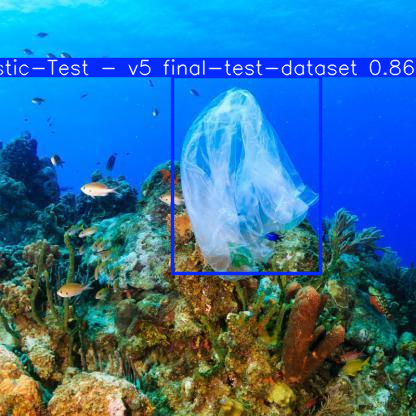

In [7]:
results = model("/kaggle/working/Deep-plastic-1/train/images/10_jpg.rf.1321241f25013970c54fb860d63be706.jpg", save=True)
results[0].show()

In [8]:
metrics=model.val()

Ultralytics 8.3.70 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)


val: Scanning /kaggle/working/Deep-plastic-1/valid/labels.cache... 565 images, 0 backgrounds, 0 corrupt: 100%|██████████| 565/565 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:05<00:00,  6.69it/s]


                   all        565        883      0.892       0.74      0.845      0.552


invalid value encountered in less
invalid value encountered in less


Speed: 0.1ms preprocess, 4.5ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val


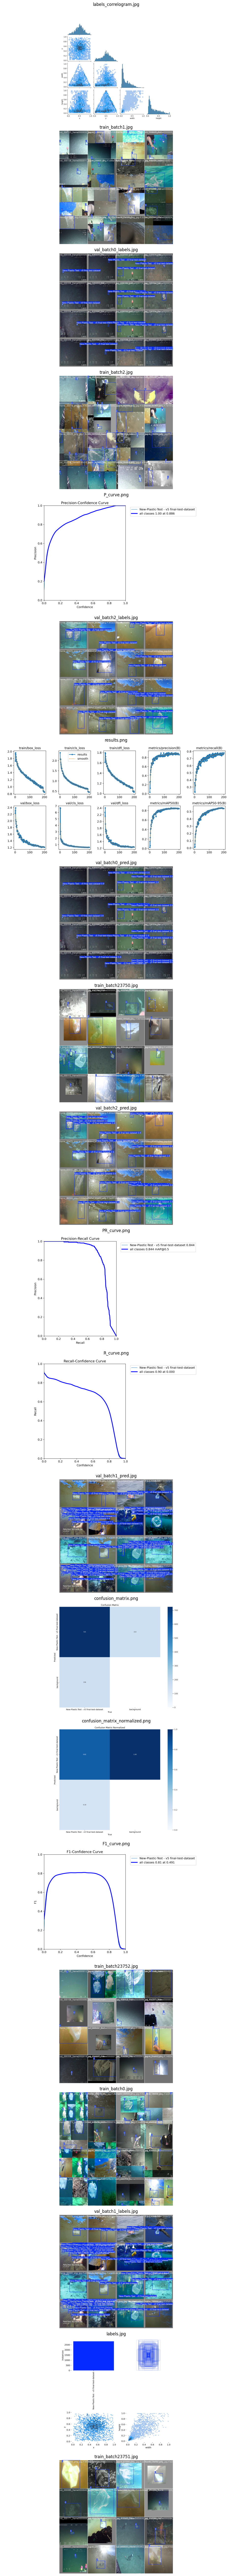

In [9]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the folder containing images
image_folder = '/kaggle/working/runs/detect/train'

# List all image files in the folder
image_files = [f for f in os.listdir(image_folder) if f.endswith(('png', 'jpg', 'jpeg', 'tif'))]

# Set up the plot grid based on the number of images
num_images = len(image_files)
cols = 1  # You can adjust this depending on how many images you'd like to display per row
rows = (num_images // cols) + (1 if num_images % cols != 0 else 0)

# Create a figure to display the images
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

# Flatten axes array for easier indexing if the number of rows and columns don't match exactly
axes = axes.flatten()

# Display each image
for i, img_file in enumerate(image_files):
    img_path = os.path.join(image_folder, img_file)
    img = mpimg.imread(img_path)
    
    # Display the image
    axes[i].imshow(img)
    axes[i].axis('off')  # Hide axes
    axes[i].set_title(img_file)  # Set image title as the filename

# Hide any unused axes
for i in range(num_images, len(axes)):
    axes[i].axis('off')

# Show the plot
plt.tight_layout()
plt.show()